# Invoke Bedrock model for code generation

> *This notebook should work well with the **`Data Science 3.0`** kernel in SageMaker Studio*

## Introduction

In this notebook we show you how to use a LLM to generate code based on the text prompt.

We will use Bedrock's Claude v2 using the Boto3 API. 

The prompt used in this example is called a zero-shot prompt because we are not providing any examples of text other than the prompt.

**Note:** *This notebook can be run within or outside of AWS environment.*

#### Context
To demonstrate the code generation capability of Amazon Bedrock, we will explore the use of Boto3 client to communicate with Amazon Bedrock API. We will demonstrate different configurations available as well as how simple input can lead to desired outputs.

#### Pattern
We will simply provide the Amazon Bedrock API with an input consisting of a task, an instruction and an input for the model under the hood to generate an output without providing any additional example. The purpose here is to demonstrate how the powerful LLMs easily understand the task at hand and generate compelling outputs.

![](./images/bedrock-code-gen.png)

#### Use case
To demonstrate the generation capability of models in Amazon Bedrock, let's take the use case of code generation.

#### Persona

You are Moe, a Data Analyst, at AnyCompany. The company wants to understand its sales performance for different products for different products over the past year. You have been provided a dataset named sales.csv. The dataset contains the following columns:

- Date (YYYY-MM-DD) format
- Product_ID (unique identifer for each product)
- Price (price at which each product was sold)

#### Implementation
To fulfill this use case, in this notebook we will show how to generate code for a given prompt.We will use the Anthropic Claude v2 using the Amazon Bedrock API with Boto3 client. 

## Setup

Before running the rest of this notebook, you'll need to run the cells below to (ensure necessary libraries are installed and) connect to Bedrock.

For more details on how the setup works and ⚠️ **whether you might need to make any changes**, refer to the [Bedrock boto3 setup notebook](../00_Intro/bedrock_boto3_setup.ipynb) notebook.

In [ ]:
# Make sure you ran `download-dependencies.sh` from the root of the repository first!
%pip install --no-build-isolation --force-reinstall \
    ../dependencies/awscli-*-py3-none-any.whl \
    ../dependencies/boto3-*-py3-none-any.whl \
    ../dependencies/botocore-*-py3-none-any.whl

%pip install --quiet langchain==0.0.249

In [ ]:
# Optional - To execute the generated code in this notebook
%pip install matplotlib

In [ ]:
import json
import os
import sys

import boto3

module_path = ".."
sys.path.append(os.path.abspath(module_path))
from utils import bedrock, print_ww


# ---- ⚠️ Un-comment and edit the below lines as needed for your AWS setup ⚠️ ----

# os.environ["AWS_DEFAULT_REGION"] = "<REGION_NAME>"  # E.g. "us-east-1"
# os.environ["AWS_PROFILE"] = "<YOUR_PROFILE>"
# os.environ["BEDROCK_ASSUME_ROLE"] = "<YOUR_ROLE_ARN>"  # E.g. "arn:aws:..."
# os.environ["BEDROCK_ENDPOINT_URL"] = "<YOUR_ENDPOINT_URL>"  # E.g. "https://..."


boto3_bedrock = bedrock.get_bedrock_client(
    assumed_role=os.environ.get("BEDROCK_ASSUME_ROLE", None),
    endpoint_url=os.environ.get("BEDROCK_ENDPOINT_URL", None),
    region=os.environ.get("AWS_DEFAULT_REGION", None),
)

## Code Generation

Following on the use case explained above, let's prepare an input for  the Amazon Bedrock service to generate python program for our use-case.

In [16]:
# Create the prompt
# Analyzing sales with a Python Program

prompt_data = """
Command: Human: You have a CSV, sales.csv, with columns:
- date (YYYY-MM-DD)
- product_id
- price
- units_sold

Wrte a python program to load the data and determine 

- Total revenue for the year
- The product with the highest revenue
- The date with the highest revenue
- Visualize monthly sales using a bar chart

Assistant:
"""

Let's start by using the Anthropic Claude V2 model.

In [17]:
# Claude - Body Syntex
body = json.dumps({
                    "prompt": prompt_data,
                    "max_tokens_to_sample":4096,
                    "temperature":0.5,
                    "top_k":250,
                    "top_p":0.5,
                    "stop_sequences": ["\n\nHuman:"]
                  }) 

The Amazon Bedrock API provides you with an API `invoke_model` which accepts the following:
- `modelId`: This is the model ARN for the various foundation models available under Amazon Bedrock
- `accept`: The type of input request
- `contentType`: The content type of the output
- `body`: A json string consisting of the prompt and the configurations

Available text generation models under Amazon Bedrock have the following IDs:
- `amazon.titan-tg1-large`
- `amazon.titan-e1t-medium`
- `ai21.j2-grande-instruct`
- `ai21.j2-jumbo-instruct`
- `ai21.j2-mid`
- `ai21.j2-ultra`
- `anthropic.claude-instant-v1`
- `anthropic.claude-v1`
- `anthropic.claude-v2`

#### Invoke the Anthropic Claude v2 model

First, we explore how the model generates an output based on the prompt created earlier.

##### Complete Output Generation

In [23]:
modelId = 'anthropic.claude-v2' # change this to use a different version from the model provider
accept = 'application/json'
contentType = 'application/json'

response = boto3_bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
response_body = json.loads(response.get('body').read())

print_ww(response_body.get('completion'))

 Here is a Python program to analyze the sales CSV file as described:

```python
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

revenue_by_month = defaultdict(int)

with open('sales.csv', 'r') as f:
    reader = csv.DictReader(f)
    total_revenue = 0
    max_revenue_product = None
    max_revenue = 0
    max_revenue_date = None

    for row in reader:
        revenue = float(row['price']) * int(row['units_sold'])
        total_revenue += revenue

        date = row['date']
        month = date.split('-')[1]
        revenue_by_month[month] += revenue

        if revenue > max_revenue:
            max_revenue = revenue
            max_revenue_product = row['product_id']
            max_revenue_date = date

print('Total revenue:', total_revenue)
print('Product with max revenue:', max_revenue_product)
print('Date with max revenue:', max_revenue_date)

plt.bar(revenue_by_month.keys(), revenue_by_month.values())
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.

#### (Optional) Execute the Bedrock generated code for validation. Go to text editor to copy the generated code as printed output can be trucncated. Replce the code in below cell.

Total revenue: 35490.0
Product with max revenue: P003
Date with max revenue: 2023-04-23


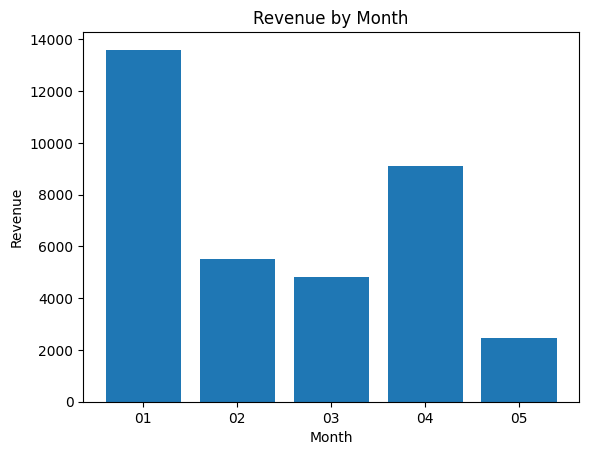

In [24]:
# Sample Generated Python Code ( Generated with Amazon Bedrock in previous step)

import csv
from collections import defaultdict
import matplotlib.pyplot as plt
 
revenue_by_month = defaultdict(int)

with open('sales.csv', 'r') as f:
    reader = csv.DictReader(f)
    total_revenue = 0
    max_revenue_product = None
    max_revenue = 0
    max_revenue_date = None

    for row in reader:
        revenue = float(row['price']) * int(row['units_sold'])
        total_revenue += revenue

        date = row['date']
        month = date.split('-')[1]
        revenue_by_month[month] += revenue

        if revenue > max_revenue:
            max_revenue = revenue
            max_revenue_product = row['product_id']
            max_revenue_date = date

print('Total revenue:', total_revenue)
print('Product with max revenue:', max_revenue_product)
print('Date with max revenue:', max_revenue_date)
# Plot 'Revenue by Month'
plt.bar(revenue_by_month.keys(), revenue_by_month.values())
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')
plt.show()

## Conclusion
You have now experimented with using `boto3` SDK which provides a vanilla exposure to Amazon Bedrock API. Using this API you generate a python program to analyze and visualize given sales data'

### Take aways
- Adapt this notebook to experiment with different models available through Amazon Bedrock such as Amazon Titan and AI21 Labs Jurassic models.
- Change the prompts to your specific usecase and evaluate the output of different models.
- Play with the token length to understand the latency and responsiveness of the service.
- Apply different prompt engineering principles to get better outputs.

## Thank You